In [ ]:
Nama : Irfan Pandu Aji
Email : panduaji7972@gmail.com
ID Dicoding : irfanaji

In [ ]:
Import Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
#GETHERING DATA
#Menggabungkan Kedua data tersebut
import pandas as pd

hour_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\hour.csv")
day_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\day.csv")

print(hour_df.head())
print(day_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

In [19]:
#ASSESING DATA
#Mengecek Misiing Velue
import pandas as pd

hour_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\hour.csv")
day_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\day.csv")

hour_df.isnull().sum()
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#ASSESING DATA
#Mengecek Duplicated Velue
import pandas as pd

hour_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\hour.csv")
day_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\day.csv")

hour_df.duplicated().sum()
day_df.duplicated().sum()

np.int64(0)

In [13]:
#ASSESING DATA
#Mengecek Outlier Velue
import pandas as pd
import numpy as np

hour_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\Bike-sharing-dataset\hour.csv")
day_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\Bike-sharing-dataset\day.csv")

def detect_outliers(df, column):
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    cut_off = iqr*1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = df[(df[column] < minimum )| (df[column] > maximum)]
    return outliers

print(detect_outliers(hour_df, 'registered'))
print(detect_outliers(hour_df, 'cnt'))
print(detect_outliers(day_df, 'registered'))
print(detect_outliers(day_df, 'cnt'))

       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
2995      2996  2011-05-09       2   0     5  17        0        1   
3019      3020  2011-05-10       2   0     5  17        0        2   
3067      3068  2011-05-12       2   0     5  17        0        4   
3187      3188  2011-05-17       2   0     5  17        0        2   
3379      3380  2011-05-25       2   0     5  17        0        3   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17063    17064  2012-12-18       4   1    12  18        0        2   
17077    17078  2012-12-19       4   1    12   8        0        3   
17086    17087  2012-12-19       4   1    12  17        0        3   
17087    17088  2012-12-19       4   1    12  18        0        3   
17101    17102  2012-12-20       4   1    12   8        0        4   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
2995            1           1  0.62  0.6212  0.38     0.2537      59   
3019           

In [ ]:
Pada Tahap Asessing data terdapat kejanggalan pada tabel "hour" dan "day" (kejanggalan yang terjadi yaitu pada Outlires yaitu nilai entry yang tidak signifikan dalam registered dan cnt.) 
maka akan lanjut pada tahap selanjutnya yaitu Cleaning Data

In [9]:
#CLEANING DATA
#Menagatasi Outlier dengan cara di mask() dan dropna()

import pandas as pd
import numpy as np

hour_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\Bike-sharing-dataset\hour.csv")
day_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\Bike-sharing-dataset\day.csv")

def detect_outliers(df, column):
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    cut_off = iqr*1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    return (df[column] < minimum) | (df[column] > maximum)

hour_df_masked = hour_df.mask(detect_outliers(hour_df, 'registered'))
hour_df_masked = hour_df_masked.mask(detect_outliers(hour_df_masked, 'cnt'))

hour_df_cleaned = hour_df_masked.dropna()
print(hour_df_cleaned.head())

day_df_masked = day_df.mask(detect_outliers(day_df, 'registered'))
day_df_masked = day_df_masked.mask(detect_outliers(day_df_masked, 'cnt'))

day_df_cleaned = day_df_masked.dropna()
print(day_df_cleaned.head())

   instant      dteday  season   yr  mnth   hr  holiday  weekday  workingday  \
0      1.0  2011-01-01     1.0  0.0   1.0  0.0      0.0      6.0         0.0   
1      2.0  2011-01-01     1.0  0.0   1.0  1.0      0.0      6.0         0.0   
2      3.0  2011-01-01     1.0  0.0   1.0  2.0      0.0      6.0         0.0   
3      4.0  2011-01-01     1.0  0.0   1.0  3.0      0.0      6.0         0.0   
4      5.0  2011-01-01     1.0  0.0   1.0  4.0      0.0      6.0         0.0   

   weathersit  temp   atemp   hum  windspeed  casual  registered   cnt  
0         1.0  0.24  0.2879  0.81        0.0     3.0        13.0  16.0  
1         1.0  0.22  0.2727  0.80        0.0     8.0        32.0  40.0  
2         1.0  0.22  0.2727  0.80        0.0     5.0        27.0  32.0  
3         1.0  0.24  0.2879  0.75        0.0     3.0        10.0  13.0  
4         1.0  0.24  0.2879  0.75        0.0     0.0         1.0   1.0  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0      

In [15]:
#EXPLORATORY DATA ANALYST
#Mendeskripsikan kedua data menggunakan describe()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

hour_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\hour.csv")
day_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\day.csv")

def detect_outliers(df, column):
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    cut_off = iqr*1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    return (df[column] < minimum) | (df[column] > maximum)

hour_df_masked = hour_df.mask(detect_outliers(hour_df, 'registered'))
hour_df_masked = hour_df_masked.mask(detect_outliers(hour_df_masked, 'cnt'))

hour_df_cleaned = hour_df_masked.dropna()
print(hour_df_cleaned.head())

day_df_masked = day_df.mask(detect_outliers(day_df, 'registered'))
day_df_masked = day_df_masked.mask(detect_outliers(day_df_masked, 'cnt'))

day_df_cleaned = day_df_masked.dropna()
print(day_df_cleaned.head())

hour_df.describe(include="all")
day_df.describe(include="all")

   instant      dteday  season   yr  mnth   hr  holiday  weekday  workingday  \
0      1.0  2011-01-01     1.0  0.0   1.0  0.0      0.0      6.0         0.0   
1      2.0  2011-01-01     1.0  0.0   1.0  1.0      0.0      6.0         0.0   
2      3.0  2011-01-01     1.0  0.0   1.0  2.0      0.0      6.0         0.0   
3      4.0  2011-01-01     1.0  0.0   1.0  3.0      0.0      6.0         0.0   
4      5.0  2011-01-01     1.0  0.0   1.0  4.0      0.0      6.0         0.0   

   weathersit  temp   atemp   hum  windspeed  casual  registered   cnt  
0         1.0  0.24  0.2879  0.81        0.0     3.0        13.0  16.0  
1         1.0  0.22  0.2727  0.80        0.0     8.0        32.0  40.0  
2         1.0  0.22  0.2727  0.80        0.0     5.0        27.0  32.0  
3         1.0  0.24  0.2879  0.75        0.0     3.0        10.0  13.0  
4         1.0  0.24  0.2879  0.75        0.0     0.0         1.0   1.0  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0      

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


   instant      dteday  season   yr  mnth   hr  holiday  weekday  workingday  \
0      1.0  2011-01-01     1.0  0.0   1.0  0.0      0.0      6.0         0.0   
1      2.0  2011-01-01     1.0  0.0   1.0  1.0      0.0      6.0         0.0   
2      3.0  2011-01-01     1.0  0.0   1.0  2.0      0.0      6.0         0.0   
3      4.0  2011-01-01     1.0  0.0   1.0  3.0      0.0      6.0         0.0   
4      5.0  2011-01-01     1.0  0.0   1.0  4.0      0.0      6.0         0.0   

   weathersit  temp   atemp   hum  windspeed  casual  registered   cnt  
0         1.0  0.24  0.2879  0.81        0.0     3.0        13.0  16.0  
1         1.0  0.22  0.2727  0.80        0.0     8.0        32.0  40.0  
2         1.0  0.22  0.2727  0.80        0.0     5.0        27.0  32.0  
3         1.0  0.24  0.2879  0.75        0.0     3.0        10.0  13.0  
4         1.0  0.24  0.2879  0.75        0.0     0.0         1.0   1.0  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0      

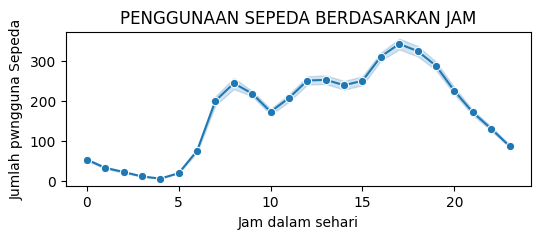

In [1]:
#Visualization & Explanatory Analysis
#Menampilkan visualisasi data dengan Line Char dan Menemukan jawaban dari analisa bisnis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

hour_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\hour.csv")
day_df = pd.read_csv(r"C:\Users\USER\Documents\Learn Python MSIB\submission\data\day.csv")

def detect_outliers(df, column):
    q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = q75 - q25
    cut_off = iqr*1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    return (df[column] < minimum) | (df[column] > maximum)

hour_df_masked = hour_df.mask(detect_outliers(hour_df, 'registered'))
hour_df_masked = hour_df_masked.mask(detect_outliers(hour_df_masked, 'cnt'))

hour_df_cleaned = hour_df_masked.dropna()
print(hour_df_cleaned.head())

day_df_masked = day_df.mask(detect_outliers(day_df, 'registered'))
day_df_masked = day_df_masked.mask(detect_outliers(day_df_masked, 'cnt'))

day_df_cleaned = day_df_masked.dropna()
print(day_df_cleaned.head())

hour_df.describe(include="all")
day_df.describe(include="all")

busiest_hour = hour_df_cleaned.loc[hour_df_cleaned['cnt'].idxmax()]
least_busy_hour = hour_df_cleaned.loc[hour_df_cleaned['cnt'].idxmin()]

plt.figure(figsize=(6,2))
sns.lineplot(data=hour_df_cleaned, x='hr', y='cnt', marker="o")
plt.title('PENGGUNAAN SEPEDA BERDASARKAN JAM')
plt.xlabel('Jam dalam sehari')
plt.ylabel('Jumlah pwngguna Sepeda')
plt.show()

hour_df.to_csv('hasil_analisa.csv', index=False)
day_df.to_csv('hasil_analisa.csv', index=False)

In [ ]:
#CONCLUSION

Menjawab Pertanyaan Bisnis 
1. Pada jam berapa dalam sehari penggunaan sepeda meningkat ?
Pada hasil analisa untuk menjawab pertanyaan menegenai ini, pengguna ramai pada jam 16:00 dengan pengguna sebanyak 783 Pengguna

2. Kapan orang sedikit menggunakan sepada dalam sehari ?
Pada hasil analisa untuk menjawab pertanyaan menegenai ini, pengguna ramai pada jam 01:00 dengan pengguna sebanyak 1 Pengguna